In [ ]:
pip install google_play_scraper #INSTALLING GOOGLE PLAY SCRAPPER

In [ ]:
from google_play_scraper import app,Sort,reviews_all #IMORTING THE LIBRRIES
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json,os,uuid
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True





# ___WEB SCRAPPING___

In [ ]:
g_reviews = reviews_all(                 #EXTRACTING THE REVIEWS
        "com.avira.passwordmanager",#WEBSITE
        sleep_milliseconds=0,
        lang='en',
        country='in',
        sort=Sort.NEWEST,
    )

In [ ]:
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))
g_df2.drop(columns={'userImage', 'reviewCreatedVersion'},inplace = True,axis = 1)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date', 'thumbsUpCount': 'thumbs_up'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2['laguage_code'] = 'en'
g_df2['country_code'] = 'us'

In [ ]:
g_df2.shape

(715, 13)

In [ ]:
g_df2.head() #THE DATAFRAME CONTAINING THE REVIEWS ADN THE DATA RELETAED TO THE REVIEWS

,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,38262b17-70e8-4384-bf47-37e9b19a5b8f,Jason Hamer,None,"Great service, but the app is stuck in a log i...",1,1,2023-07-20 02:42:02,Hello Jason! We deeply apologize for the troub...,2023-07-19 18:49:16,None,en,us
1,Google Play,a5d6317b-8769-45ce-bb6a-ccc5f0ebe31b,nishiki,None,I've been using Avira Password Manager for a f...,5,0,2023-07-13 20:57:53,None,NaT,2.10,en,us
2,Google Play,c2e6c717-e059-41b1-8795-55fd9bf7b703,Adam TR,None,"From a reputable company, keeps all your passw...",5,0,2023-07-13 00:11:30,None,NaT,2.10,en,us
3,Google Play,637219e9-3a20-45f3-816c-fb93e95eaae5,manolo teatro,None,I cant login to desktop web browser giving me ...,1,0,2023-07-12 06:14:59,We apologize for the inconvenience. To resolve...,2023-07-15 01:16:40,None,en,us
4,Google Play,f9dedf0e-494a-49c1-9722-01a18d504166,Rogue Development,None,Good app,5,0,2023-07-11 11:35:08,None,NaT,2.10,en,us


#___EDA___

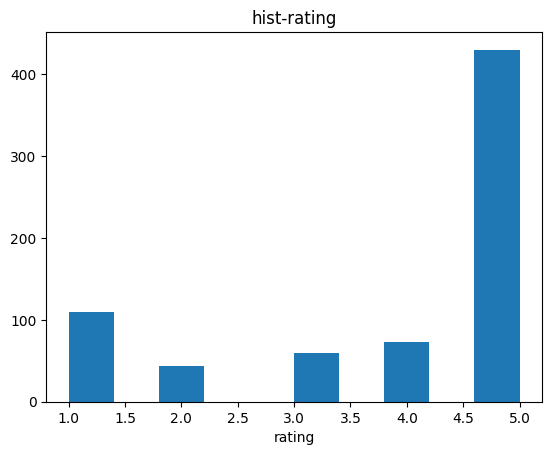

In [ ]:
plt.hist(g_df2['rating'])  #SHOWS THE NUMBER OF REVIEWS IN DIFFERENT RATINGS
plt.xlabel("rating")
plt.title("hist-rating")
plt.show()

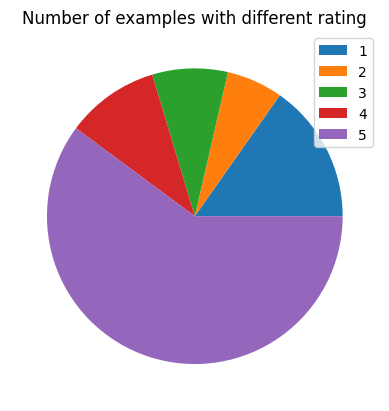

In [ ]:
x = [sum(g_df2["rating"] == 1),sum(g_df2["rating"] == 2),sum(g_df2["rating"] == 3),sum(g_df2["rating"] == 4),sum(g_df2["rating"] == 5)]
plt.pie(x)
plt.legend([1,2,3,4,5])
plt.title("Number of examples with different rating")
plt.show()

In [ ]:
df = g_df2['review_description'] #EXTRACTING THE REVIEWS FROM THE OBTAINED DATASET

In [ ]:
df.head()

0    Great service, but the app is stuck in a log i...
1    I've been using Avira Password Manager for a f...
2    From a reputable company, keeps all your passw...
3    I cant login to desktop web browser giving me ...
4                                             Good app
Name: review_description, dtype: object





# ____VADER____

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer  #IMPORTING VADER
vad = SentimentIntensityAnalyzer()
res = vad.polarity_scores(df[0])
print(res)

{'neg': 0.079, 'neu': 0.728, 'pos': 0.193, 'compound': 0.5574}


In [ ]:
c = 0
op = []
for i in range(715):
  res = vad.polarity_scores(df[i])
  op += [[res['neg'],res['neu'],res['pos']]]  #STORING THE RESULTS OF THE VADER

In [ ]:
df_2 = pd.DataFrame(op)

In [ ]:
df_2.shape

(715, 3)

In [ ]:
df = pd.concat([df,df_2],axis = 1) #STORING THE RESULTS WITH THE REVIEWS

In [ ]:
df.head()

,review_description,0,1,2
0,"Great service, but the app is stuck in a log i...",0.079,0.728,0.193
1,I've been using Avira Password Manager for a f...,0.000,0.816,0.184
2,"From a reputable company, keeps all your passw...",0.000,0.807,0.193
3,I cant login to desktop web browser giving me ...,0.175,0.767,0.058
4,Good app,0.000,0.256,0.744


In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.head()

,review_description,0,1,2
0,"Great service, but the app is stuck in a log i...",0.079,0.728,0.193
1,I've been using Avira Password Manager for a f...,0.000,0.816,0.184
2,"From a reputable company, keeps all your passw...",0.000,0.807,0.193
3,I cant login to desktop web browser giving me ...,0.175,0.767,0.058
4,Good app,0.000,0.256,0.744


In [ ]:
df.columns = ['review','vader_neg','vader_neu','vader_pos']

In [ ]:
df.head()

,review,vader_neg,vader_neu,vader_pos
0,"Great service, but the app is stuck in a log i...",0.079,0.728,0.193
1,I've been using Avira Password Manager for a f...,0.000,0.816,0.184
2,"From a reputable company, keeps all your passw...",0.000,0.807,0.193
3,I cant login to desktop web browser giving me ...,0.175,0.767,0.058
4,Good app,0.000,0.256,0.744


In [ ]:
df = pd.concat([df,g_df2["rating"]],axis = 1)

#___ANALYSIS OF THE VADER RESULTS___

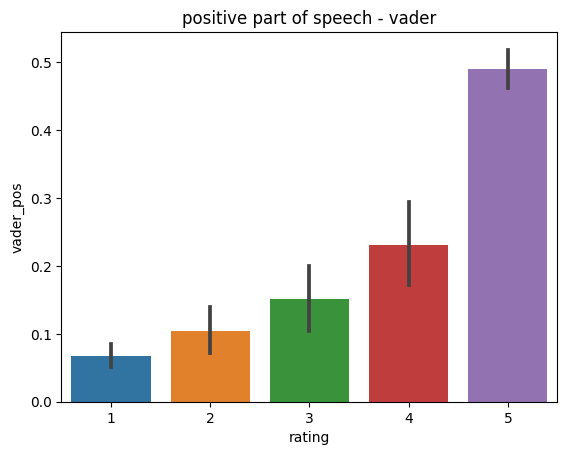

In [ ]:
sns.barplot(x = "rating",y = "vader_pos",data = df) #ANALYSING THE RANGE OF POSITIVE VALUES IN THE SPEECH FOR EACH RATING
plt.title("positive part of speech - vader")
plt.show()

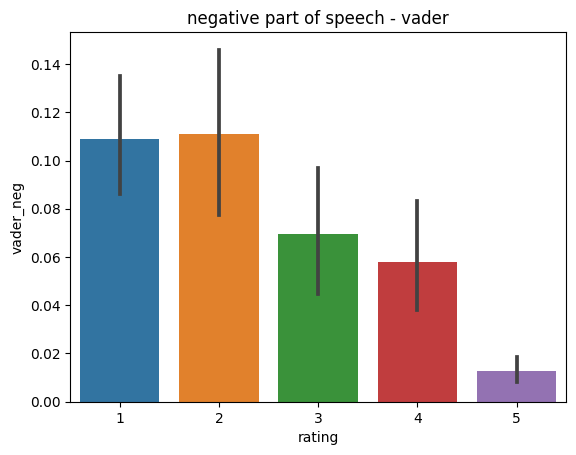

In [ ]:
sns.barplot(x = "rating",y = "vader_neg",data = df)#ANALYSING THE RANGE OF NEGATIVE VALUES IN THE SPEECH FOR EACH RATING
plt.title("negative part of speech - vader")
plt.show()

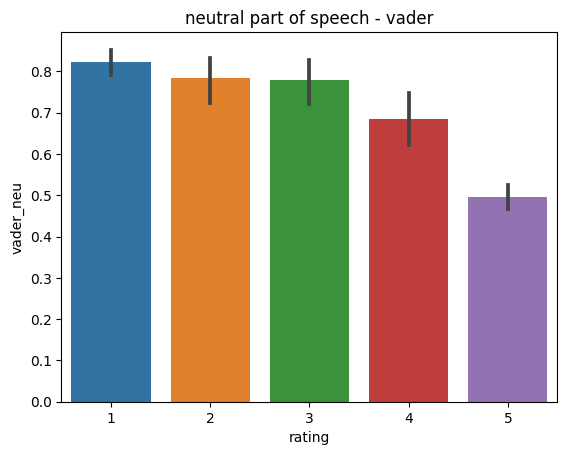

In [ ]:
sns.barplot(x = "rating",y = "vader_neu",data = df)#ANALYSING THE RANGE OF NEUTRAL VALUES IN THE SPEECH FOR EACH RATING
plt.title("neutral part of speech - vader")
plt.show()

# ___ROBERTA___

In [ ]:
pip install transformers #INSTALLING THE PACKAGE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.8 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer    #IMPORTING THE LIBRARIES
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"  #IMPORTING THE MODEL
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
encoded_text = tokenizer(df['review'][0], return_tensors='pt') #TOKENIZING AND TESTING THE MODEL
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.73932475, 'roberta_neu': 0.2197098, 'roberta_pos': 0.040965423}


In [ ]:
rob_sc = []        #PERFORMING THE SENTIMENTAL ANALYSIS OF ALL THE REVIEWS
rev = df['review']
for i in rev:
  encoded_text = tokenizer(i, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  rob_sc += [[scores[0],scores[1],scores[2]]]


In [ ]:
df_rob = pd.DataFrame(rob_sc)
df_rob.columns = ['rob_neg','rob_neu','rob_pos']
df = pd.concat([df,df_rob],axis = 1) #STORING THE RESULTS FROM RoBERTa

In [ ]:
df.head()

,review,vader_neg,vader_neu,vader_pos,rob_neg,rob_neu,rob_pos
0,"Great service, but the app is stuck in a log i...",0.079,0.728,0.193,0.739325,0.219710,0.040965
1,I've been using Avira Password Manager for a f...,0.000,0.816,0.184,0.001911,0.016632,0.981458
2,"From a reputable company, keeps all your passw...",0.000,0.807,0.193,0.017358,0.369635,0.613007
3,I cant login to desktop web browser giving me ...,0.175,0.767,0.058,0.869313,0.121202,0.009485
4,Good app,0.000,0.256,0.744,0.007448,0.064863,0.927689


In [ ]:
df['neg'] = (df['vader_neg']+df['rob_neg'])/2 #COMBINING THE RESULTS OF ROBERTA AND VADER BY AVERAGING
df['pos'] = (df['vader_pos']+df['rob_pos'])/2
df['neu'] = (df['vader_neu']+df['rob_neu'])/2

In [ ]:
df.head()

,review,vader_neg,vader_neu,vader_pos,rating,rob_neg,rob_neu,rob_pos,neg,pos,neu
0,"Great service, but the app is stuck in a log i...",0.079,0.728,0.193,1,0.739325,0.219710,0.040965,0.409162,0.116983,0.473855
1,I've been using Avira Password Manager for a f...,0.000,0.816,0.184,5,0.001911,0.016632,0.981458,0.000955,0.582729,0.416316
2,"From a reputable company, keeps all your passw...",0.000,0.807,0.193,5,0.017358,0.369635,0.613007,0.008679,0.403003,0.588318
3,I cant login to desktop web browser giving me ...,0.175,0.767,0.058,1,0.869313,0.121202,0.009485,0.522156,0.033743,0.444101
4,Good app,0.000,0.256,0.744,5,0.007448,0.064863,0.927689,0.003724,0.835844,0.160431


In [ ]:
df1 = df[['pos','neg','rating']]

In [ ]:
df1.head()

,pos,neg,rating
0,0.116983,0.409162,1
1,0.582729,0.000955,5
2,0.403003,0.008679,5
3,0.033743,0.522156,1
4,0.835844,0.003724,5


#___ANALYSIS OF THE ROBERTA RESULTS___

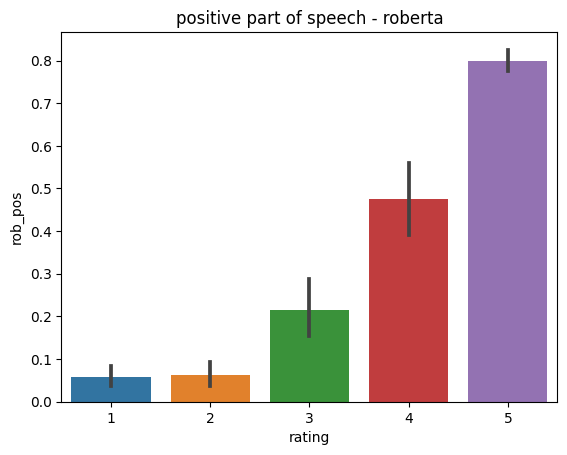

In [ ]:
sns.barplot(x = "rating",y = "rob_pos",data = df) #ANALYSING THE RANGE OF POSITIVE VALUES IN THE SPEECH FOR EACH RATING - RoBERTa
plt.title("positive part of speech - roberta")
plt.show()

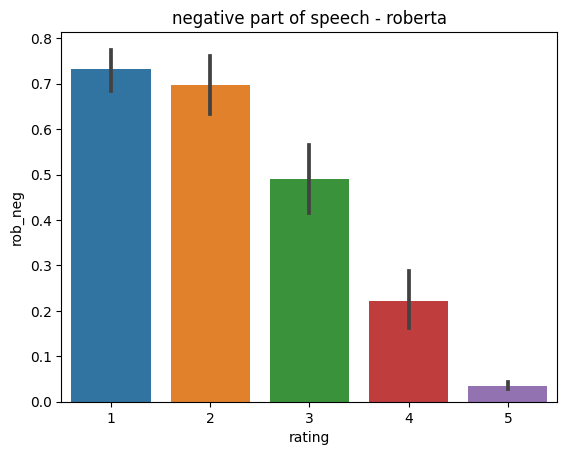

In [ ]:
sns.barplot(x = "rating",y = "rob_neg",data = df) #ANALYSING THE RANGE OF NEGATIVE VALUES IN THE SPEECH FOR EACH RATING - RoBERTa
plt.title("negative part of speech - roberta")
plt.show()

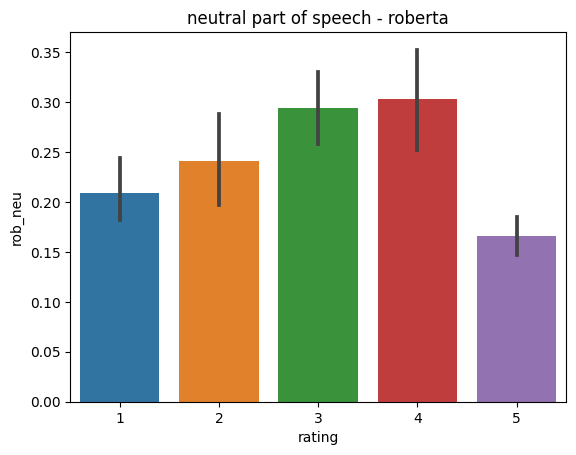

In [ ]:
sns.barplot(x = "rating",y = "rob_neu",data = df) #ANALYSING THE RANGE OF NEUTRAL VALUES IN THE SPEECH FOR EACH RATING - RoBERTa
plt.title("neutral part of speech - roberta")
plt.show()

#___ANALYSIS OF THE COMBINED RESULTS___

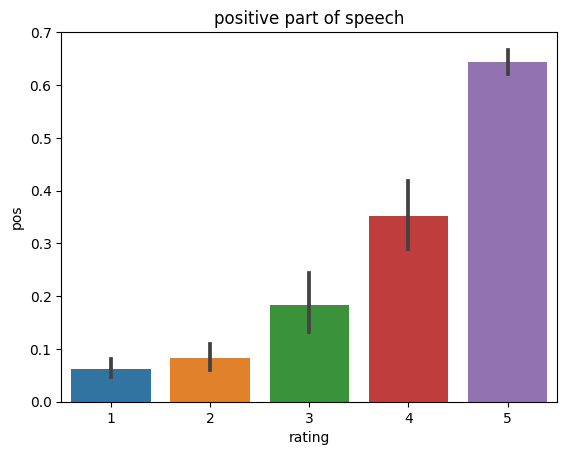

In [ ]:
sns.barplot(x = "rating",y = "pos",data = df)#ANALYSING THE RANGE OF POSITIVE VALUES IN THE SPEECH FOR EACH RATING
plt.title("positive part of speech")
plt.show()

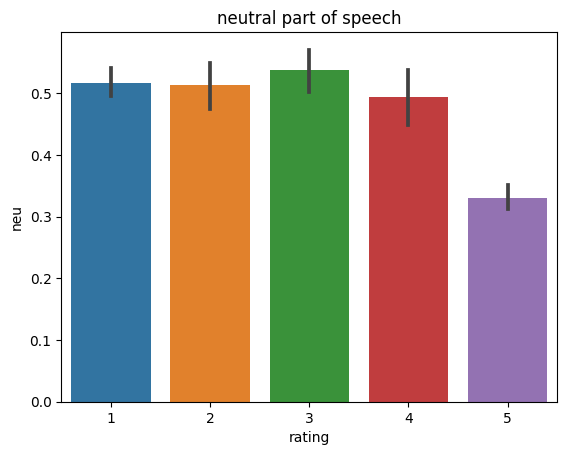

In [ ]:
sns.barplot(x = "rating",y = "neu",data = df)#ANALYSING THE RANGE OF NEGATIVE VALUES IN THE SPEECH FOR EACH RATING
plt.title("neutral part of speech")
plt.show()

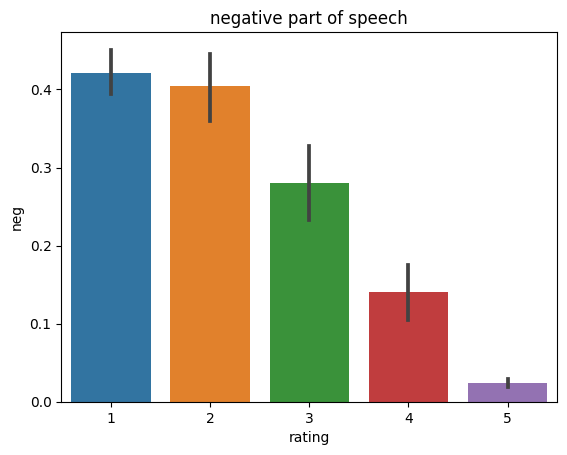

In [ ]:
sns.barplot(x = "rating",y = "neg",data = df) #ANALYSING THE RANGE OF NEUTRAL VALUES IN THE SPEECH FOR EACH RATING
plt.title("negative part of speech")
plt.show()